In [1]:
import pickle
import itertools
import open3d as o3d
import numpy as np
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
%matplotlib notebook

In [3]:
def rotation_mat(angle):
    Rx = np.array([[1,0,0],
                 [0, np.cos(angle[0]), -np.sin(angle[0])],
                 [0, np.sin(angle[0]), np.cos(angle[0])]])

    Ry = np.array([[np.cos(angle[1]), 0, np.sin(angle[1])],
                 [0,1,0],
                 [-np.sin(angle[1]), 0, np.cos(angle[1])]])

    Rz = np.array([[np.cos(angle[2]), -np.sin(angle[2]), 0],
                 [np.sin(angle[2]), np.cos(angle[2]), 0],
                 [0,0,1]])
    return Rz@Rx@Ry
angle = [np.pi, np.pi, 0] # pcd.rotate()
#angle = [-np.pi/2, np.pi/2, np.pi/2]
R = rotation_mat(angle)
R_mirror = np.array([[-1,0,0],
                    [0,1,0],
                    [0,0,1]])

In [4]:
with open("curves_by/fixed/smoothed/s_112_b20_s100_lmin40_lmax_100_o15_six_hole_leaf.curves", "rb") as pickle_file:
    s_curve_list = pickle.load(pickle_file)

<IPython.core.display.Javascript object>


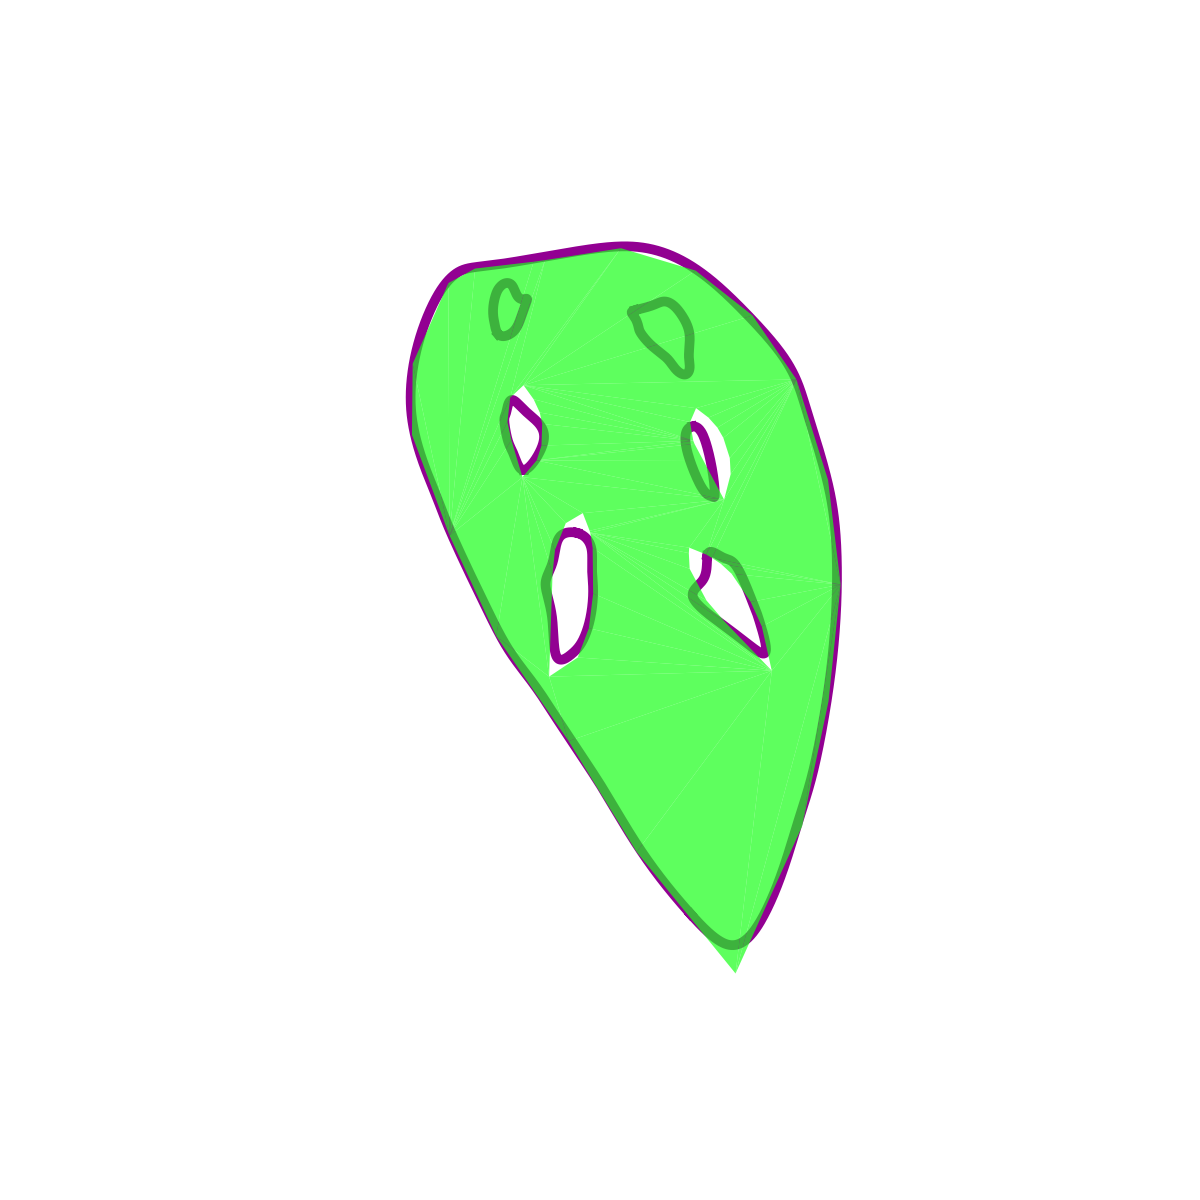

In [14]:
fig = plt.figure(figsize = (12, 12))
fig.patch.set_alpha(0.)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("x", size = 14)
ax.set_ylabel("z", size = 14)
ax.set_zlabel("y", size = 14)
ax.set_box_aspect((1,1,1))
ax.view_init(elev=30, azim=-70)

ax.axis("off")

mesh = o3d.io.read_triangle_mesh("polygon/fix/four_hole_leaf.ply")
mesh.triangles = o3d.utility.Vector3iVector(np.asarray(mesh.triangles)[np.asarray(mesh.cluster_connected_triangles()[0])==0])# i
#mesh.vertices = o3d.utility.Vector3iVector(ver)
for i in range(len(np.asarray(mesh.triangles))):
    ver = np.asarray(mesh.vertices)[np.asarray(mesh.triangles)[i]]
    x, y, z = ver[:,0], ver[:,1], ver[:,2]
    ax.plot_trisurf(x, y, z, color="#1AFF1A", shade=False, alpha=0.7)

for i in range(len(s_curve_list)):
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(s_curve_list[i].T)
    pcd.rotate(np.linalg.inv(R),(0,0,0))
    pcd.scale(10,(0,0,0))
    s_c = np.array(pcd.points)
    x_q, y_q, z_q = s_c[:,0], s_c[:,1], s_c[:,2]
    ax.plot(x_q, y_q, z_q,"-",lw=7,color="#920092")#,color="green"
      

plt.show()